In [1]:
import numpy as np
from sampler import *
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.stats import binned_statistic

np.random.seed(1)

# Exercício 1

In [2]:
def uniform(x):
    if x < 0:
        return 0
    if x > 1:
        return 0
    else:
        return 1

def normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

x0 = 10
sigma = 1

def erf(x):
    if x > 0:
        return (np.exp(-(x-x0)**2/(2*sigma**2) - np.exp(-(x+x0)**2/(2*sigma**2))))/(sigma*np.sqrt(np.pi*2))/sp.erf(x0/sigma/np.sqrt(2))
    else:
        return 0    

## a)

In [3]:
uniform_sampler = Sampler(uniform, domain=(True, 0, 1))
normal_sampler = Sampler(normal)
erf_sampler = Sampler(erf)

N = 10

samples_uniform = uniform_sampler.sample(N)
samples_normal = normal_sampler.sample(N)
samples_erf = erf_sampler.sample(N)

## b)

In [4]:
uniform_rel_diff = []
normal_rel_diff = []
erf_rel_diff = []

for N, n_bins in [(10, 4), (100, 10), (1000, 20), (10000, 20)]:
    uniform_samples = uniform_sampler.sample(N)
    normal_samples = normal_sampler.sample(N)
    erf_samples = erf_sampler.sample(N)

    uniform_samples.set_bins(0, 1, n_bins)
    normal_samples.set_bins(-3, 3, n_bins)
    erf_samples.set_bins(x0-3*sigma, x0+3*sigma, n_bins)

    uniform_rel_diff.append((uniform_samples.rel_diff_hist, N, uniform_samples.bins, 'Uniform distribution'))
    normal_rel_diff.append((normal_samples.rel_diff_hist, N, normal_samples.bins, 'Normal distribution'))
    erf_rel_diff.append((erf_samples.rel_diff_hist, N, erf_samples.bins, 'Erf distribution'))

## c)

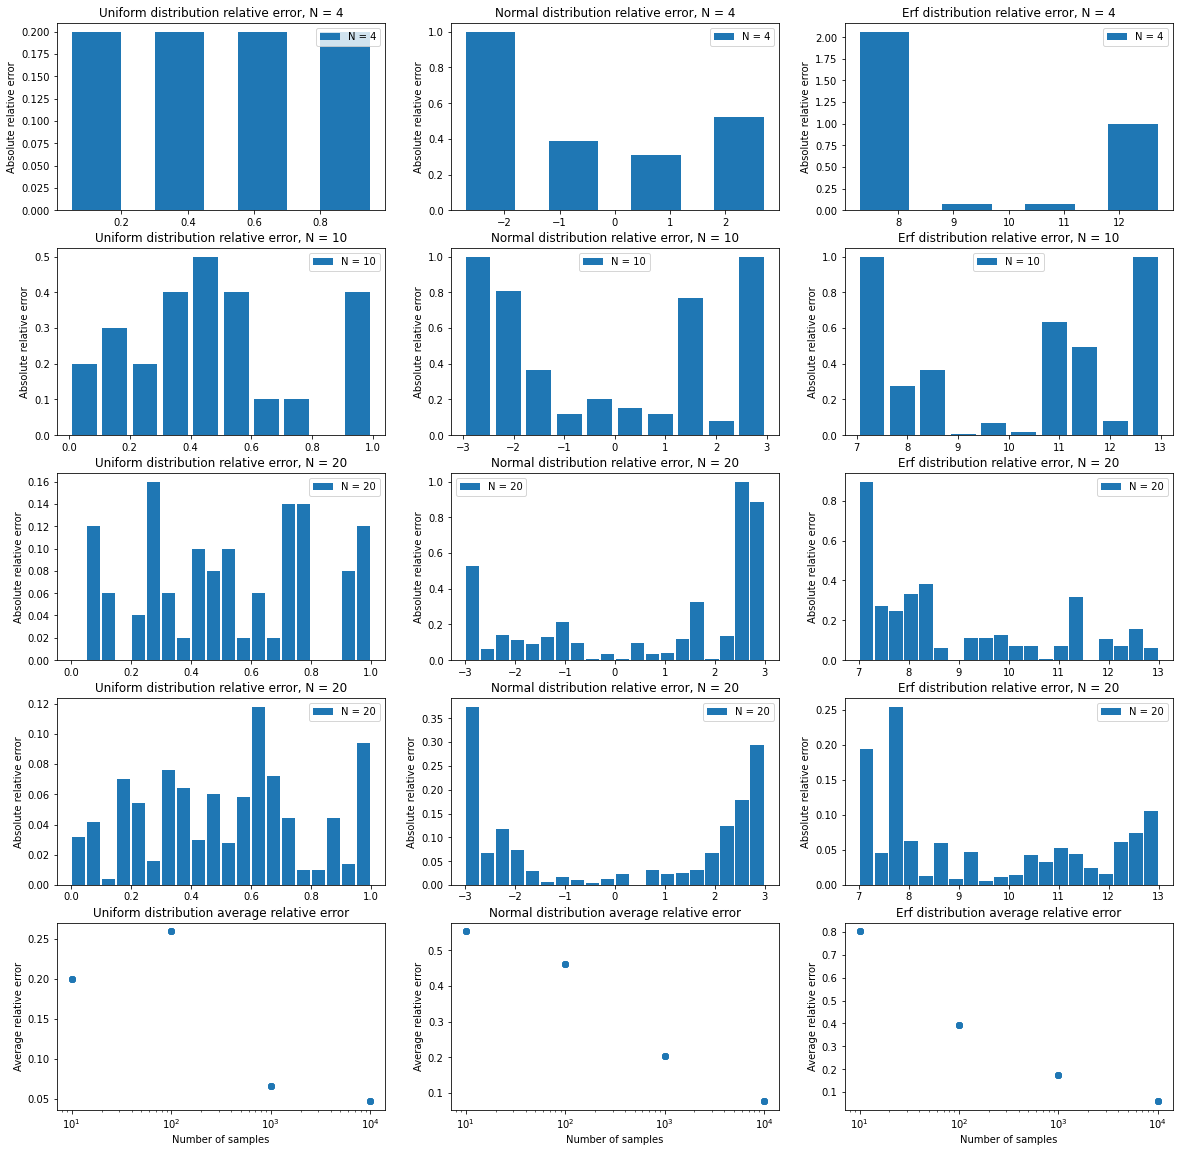

In [5]:
fig, ax = plt.subplots(5, 3, figsize=(20,20), facecolor="white")

def plot_bar(rel_diff, plot):
    n_bins = len(rel_diff[2])
    bins = [(rel_diff[2][j]+rel_diff[2][j+1])/2 for j in range(n_bins-1)]
    total_range = max(bins)-min(bins)
    bar_width = total_range/n_bins
    plot.bar(bins, rel_diff[0], width=bar_width, label=f'N = {len(rel_diff[0])}')
    plot.set_title(f'{rel_diff[3]} relative error, N = {len(rel_diff[0])}')
    plot.set_ylabel('Absolute relative error')
    plot.legend()

for i in range(4):
    for rel_diff, j in zip([uniform_rel_diff, normal_rel_diff, erf_rel_diff], range(3)):
        plot_bar(rel_diff[i], ax[i][j])
        average_rel_diff = [sum(rel_diff[k][0])/len(rel_diff[k][0]) for k in range(4)]
        ax[4][j].plot([10, 100, 1000, 10000], average_rel_diff, 'o', color='tab:blue')
        ax[4][j].set_xscale('log')
        ax[4][j].set_ylabel('Average relative error')
        ax[4][j].set_xlabel('Number of samples')
        ax[4][j].set_title(f'{rel_diff[i][3]} average relative error')

plt.savefig("relative_diff.png")

# Exercício 2

In [6]:
averages = []
variances = []
avg_averages = []
avg_variances = []

t = 10000

for i in range(t):
    normal_samples = normal_sampler.sample(10)
    normal_samples.set_moments()
    averages.append(normal_samples.average)
    variances.append(normal_samples.variance)
    avg_averages.append((sum(averages))/len(averages))
    avg_variances.append((sum(variances))/len(variances))


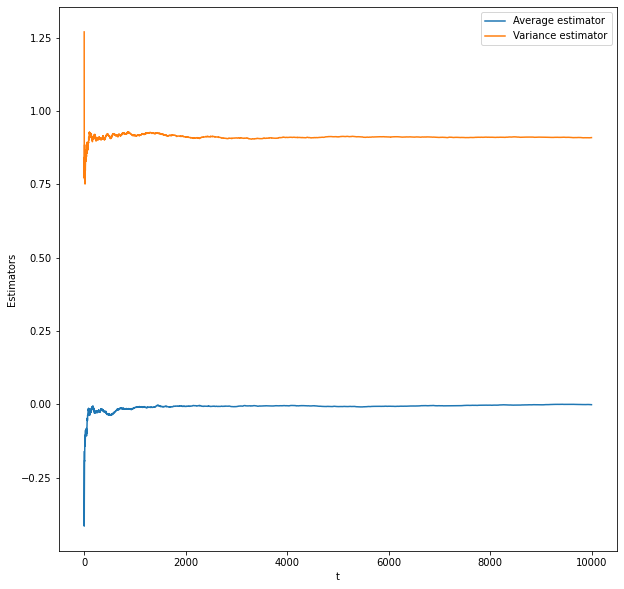

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,10), facecolor="white")

ax.plot(range(t), avg_averages, label='Average estimator')
ax.plot(range(t), avg_variances, label='Variance estimator')
ax.set_ylabel('Estimators')
ax.set_xlabel('t')
ax.legend()


We can see that the variance estimator is clearly biased.

# Exercício 3

In [8]:
N = [10**(i+1) for i in range(3)]
skews = []
curtosis = []

for n in N:
    erf_samples = erf_sampler.sample(n)
    erf_samples.set_moments()
    skews.append(erf_samples.skew)
    curtosis.append(erf_samples.curtosis)

In [9]:
for i in range(len(N)):
    print(f"{skews[i]:+.4f} {curtosis[i]:+.4f} {N[i]}")

-0.2453 -1.0012 10
-0.0480 -0.2378 100
-0.1368 -0.0279 1000


Ambos se estabilizam em até duas casas decimais em N = 1000000.

# Exercício 4

## a)

In [10]:
N = [10**(i+1) for i in range(3)]
covariance_1 = []
correlation_1 = []

for n in N:
    uniform_samples = uniform_sampler.sample(n)
    normal_samples = normal_sampler.sample(n)
    xy_1 = Data([uniform_samples.data, normal_samples.data])
    xy_1.set_cov()
    covariance_1.append(xy_1.covariance)
    correlation_1.append(xy_1.correlation)

for i in range(len(N)):
    print(f"{covariance_1[i]:+.4f} {correlation_1[i]:+.4f} {N[i]}")

+0.0342 +0.2225 10
+0.0075 +0.0319 100
+0.0083 +0.0293 1000


Ambos se estabilizam em até duas casas decimais em N = 10000.

## b)

In [11]:
covariance_2 = []
correlation_2 = []

for n in N:
    uniform_samples = uniform_sampler.sample(n)
    normal_samples = normal_sampler.sample(n)
    xy_2 = Data([uniform_samples.data, [uniform_samples.data[i] + normal_samples.data[i] for i in range(n)]])
    xy_2.set_cov()
    covariance_2.append(xy_2.covariance)
    correlation_2.append(xy_2.correlation)    

for i in range(len(N)):
    print(f"{covariance_2[i]:+.4f} {correlation_2[i]:+.4f} {N[i]}")

+0.2414 +0.8322 10
+0.1390 +0.4894 100
+0.0936 +0.3083 1000


In [12]:
covariance_3 = []
correlation_3 = []

for n in N:
    uniform_samples = uniform_sampler.sample(n)
    normal_samples = normal_sampler.sample(n)
    xy_3 = Data([uniform_samples.data, [-uniform_samples.data[i] + normal_samples.data[i] for i in range(n)]])
    xy_3.set_cov()
    covariance_3.append(xy_3.covariance)
    correlation_3.append(xy_3.correlation)    

for i in range(len(N)):
    print(f"{covariance_3[i]:+.4f} {correlation_3[i]:+.4f} {N[i]}")

+0.0050 +0.0202 10
-0.0636 -0.2226 100
-0.0843 -0.2887 1000


## c)

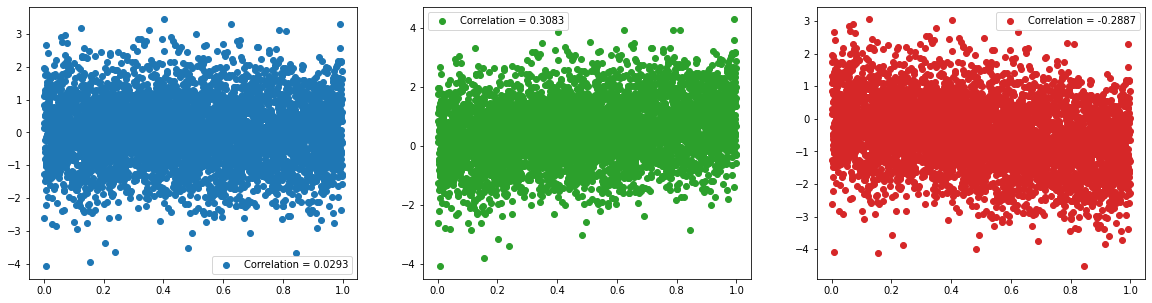

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20,5), facecolor="white")

n = 5000

uniform_samples = uniform_sampler.sample(n)
normal_samples = normal_sampler.sample(n)
xy_1 = Data([uniform_samples.data, normal_samples.data])
xy_2 = Data([uniform_samples.data, [uniform_samples.data[i] + normal_samples.data[i] for i in range(n)]])
xy_3 = Data([uniform_samples.data, [-uniform_samples.data[i] + normal_samples.data[i] for i in range(n)]])

ax[0].scatter(xy_1.data[0], xy_1.data[1], label=f'Correlation = {correlation_1[-1]:.4f}')
ax[1].scatter(xy_2.data[0], xy_2.data[1], label=f'Correlation = {correlation_2[-1]:.4f}', color='tab:green')
ax[2].scatter(xy_3.data[0], xy_3.data[1], label=f'Correlation = {correlation_3[-1]:.4f}', color='tab:red')
ax[0].legend()
ax[1].legend()
ax[2].legend()

# Exercício 5

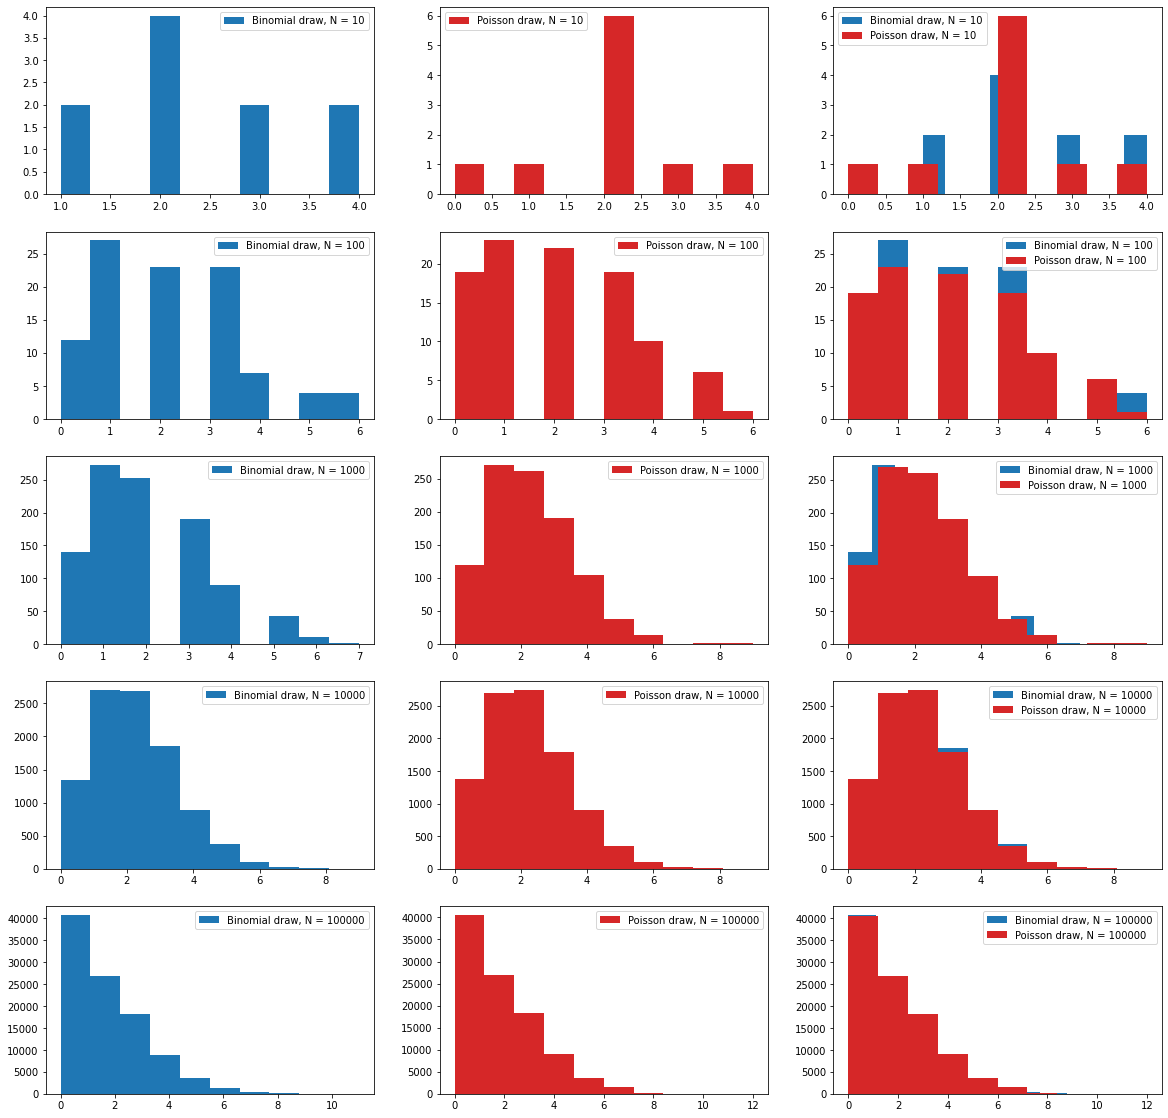

In [14]:
lam = 2
N = [10**(i+1) for i in range(5)]
fig, ax = plt.subplots(5, 3, figsize=(20,20), facecolor="white")

for i in range(5):
    n = 10**(i+1)
    p = lam/n
    binomial_draws = np.random.binomial(n, p, n)
    poisson_draws = np.random.poisson(lam, n)
    ax[i][0].hist(binomial_draws, label=f'Binomial draw, N = {n}')
    ax[i][1].hist(poisson_draws, label=f'Poisson draw, N = {n}', color='tab:red')
    ax[i][2].hist(binomial_draws, label=f'Binomial draw, N = {n}')
    ax[i][2].hist(poisson_draws, label=f'Poisson draw, N = {n}', color='tab:red')
    ax[i][0].legend()
    ax[i][1].legend()
    ax[i][2].legend()
    

### Exercício 6

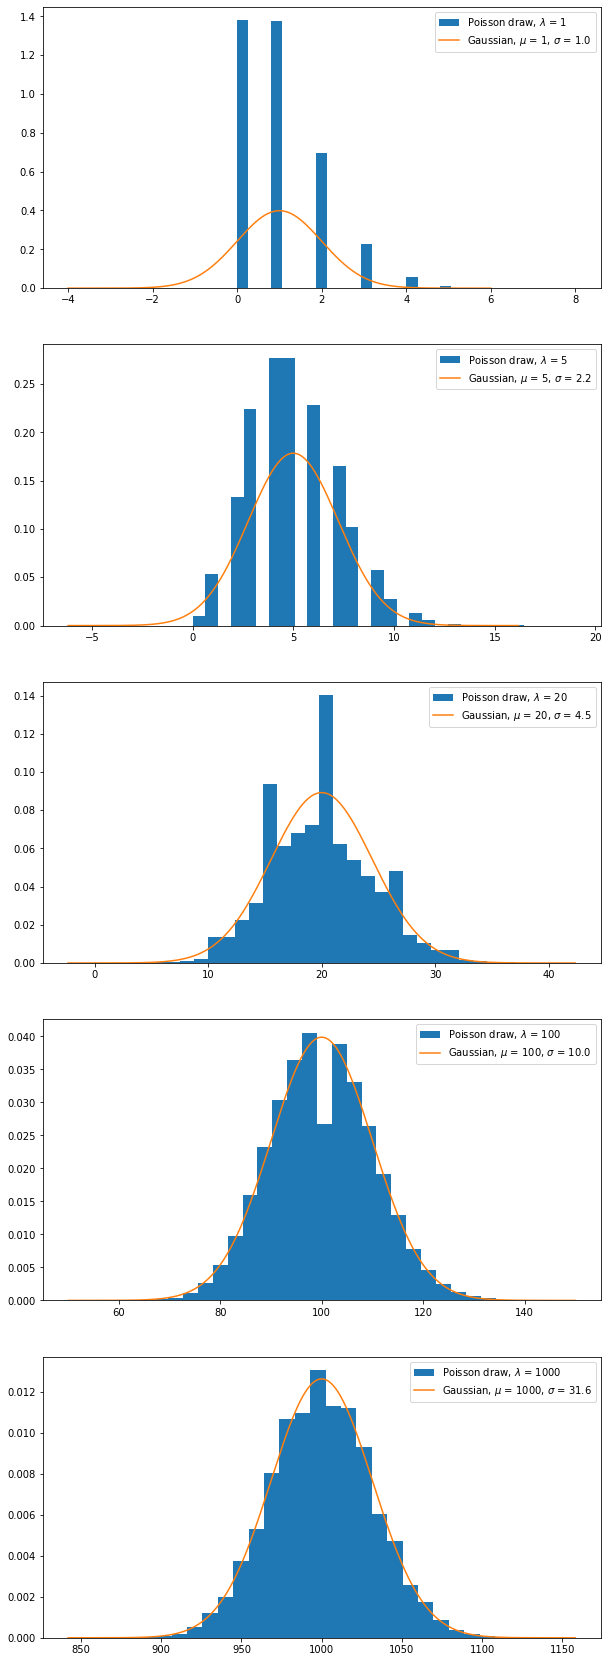

In [15]:
fig, ax = plt.subplots(5, 1, figsize=(10,30), facecolor="white")
lam = [1, 5, 20, 100, 1000]

for i in range(len(lam)):
    l = lam[i]
    x = np.linspace(l - l**0.5*5, l + l**0.5*5, 10000)
    poisson_draws = np.random.poisson(l, 100000)
    gaussian = [np.exp(-(xi-l)**2/2/l)/np.sqrt(2*np.pi)/l**0.5 for xi in x]
    ax[i].hist(poisson_draws, density=True, bins=30, label=f'Poisson draw, $\lambda$ = {l}')
    ax[i].plot(x, gaussian, label=f'Gaussian, $\mu$ = {l}, $\sigma$ = {l**0.5:.1f}')
    ax[i].legend()

    

# Exercício 7

\begin{align}
    \mathcal{P}(n\sigma) &= \int_{\Omega_n} \mathcal{d}x \mathcal{d}y \mathcal{P}(x,y)  \\
    &= \int_{\Omega_n} \mathcal{d}x \mathcal{d}y \frac{e^{-\frac{1}{2} \left( \frac{x - \mu_x}{\sigma_x} \right)^2 - \frac{1}{2} \left( \frac{y - \mu_y}{\sigma_y} \right)^2}}{2\pi\sigma_x\sigma_y} 
\end{align}

Using the following substitutions,

\begin{align}
    \bar{x} &= \frac{x - \mu_x}{\sigma_x} & \mathcal{d}\bar{x} &= \frac{1}{\sigma_x} \mathcal{d}x  \\
    \bar{y} &= \frac{y - \mu_y}{\sigma_y} & \mathcal{d}\bar{y} &= \frac{1}{\sigma_y} \mathcal{d}y 
\end{align}

we end up with 

\begin{align}
    \mathcal{P}(n\sigma) &= \int_{\Omega_n} \mathcal{d}\bar{x} \mathcal{d}\bar{y} \frac{e^{-\frac{1}{2} (\bar{x}^2 + \bar{y}^2)}}{2\pi}
\end{align}

Which can easily be seen to become

\begin{align}
    \mathcal{P}(n\sigma) &= \int_0^n \int_0^{2\pi} \mathcal{d}\chi \mathcal{d}\theta \frac{\chi e^{- \frac{1}{2}\chi^2}}{2\pi} \\
    &= - e^{- \frac{1}{2}\chi^2} |_0^n = 1 - e^{-\frac{1}{2}n^2}
\end{align}

In [19]:
for ni in range(1,4):
    p = 1 - np.exp(-ni**2/2)
    print(f'Probability {ni}-\sigma: {p:.4f}')


Probability 1-\sigma: 0.3935
Probability 2-\sigma: 0.8647
Probability 3-\sigma: 0.9889
